# Problem 1: Support Vector Machines

## Instructions:
1. Please use this q1.ipynb file to complete hw5-q1 about SVMs
2. You may create new cells for discussions or visualizations


In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

## a): Linearly Separable Dataset

(36,)
     pcost       dcost       gap    pres   dres
 0:  8.7483e-01  3.5428e+01  1e+02  2e+00  3e+01
 1:  8.4879e+00 -3.2104e+00  4e+01  6e-01  9e+00
 2:  1.6650e+01  1.1151e+01  1e+01  1e-01  2e+00
 3:  2.1484e+01  1.6526e+01  6e+00  4e-02  5e-01
 4:  2.1785e+01  2.0581e+01  2e+00  9e-03  1e-01
 5:  2.1870e+01  2.1694e+01  2e-01  2e-04  3e-03
 6:  2.1867e+01  2.1801e+01  7e-02  5e-05  7e-04
 7:  2.1861e+01  2.1860e+01  1e-03  8e-07  1e-05
 8:  2.1861e+01  2.1861e+01  1e-05  8e-09  1e-07
 9:  2.1861e+01  2.1861e+01  1e-07  8e-11  1e-09
Optimal solution found.
[ 6.83e+00]
[ 6.38e+00]
[-5.43e+00]



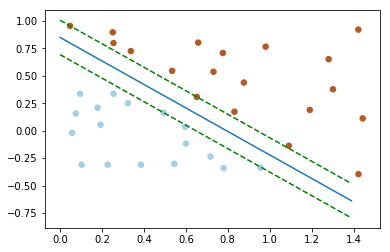

In [2]:
data = np.loadtxt('clean_lin.txt', delimiter='\t')
x = data[:, 0:2]
y = data[:, 2]

x_full = np.concatenate((x, np.ones((x.shape[0],1)) ), axis=1)
print(y.shape)

Q = 0.5*np.array([[1,0,0],[0,1,0],[0,0,0]])
Q=Q.astype('double')
Q = matrix(Q)

p=matrix(np.zeros((3,1)))

G = np.zeros((x.shape[0],3))

for i in range(x.shape[0]):
    G[i,:] = -y[i]*x_full[i,:]

G = G.astype('double')
G = matrix(G)

h = matrix(-1*np.ones((x.shape[0],1)))

# A=[]; B = []

sol = solvers.qp(Q,p,G,h)
w = sol['x']
print(w)

x_1 = np.arange(0, 1.4,0.01)
x_2 = (-w[2] - w[0]*x_1)/w[1]

x_u_2 = (1-w[2] - w[0]*x_1)/w[1]
x_l_2 = (-1-w[2] - w[0]*x_1)/w[1]

plt.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.plot( x_1, x_2 , x_1, x_u_2 ,'g--', x_1, x_l_2, 'g--' )

## b) and c) : Linearly Non-separable Dataset

[-3.17e-01]
[ 1.92e-01]
[ 1.29e+00]



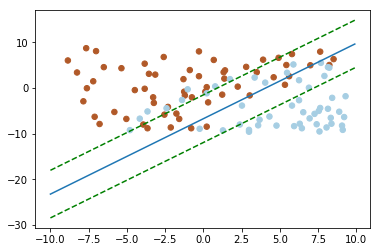

In [5]:
# Load the data set that is not linearly separable
data = np.loadtxt('dirty_nonlin.txt', delimiter='\t')
x = data[:, 0:2]
y = data[:, 2]

x_full = np.concatenate((x, np.ones((x.shape[0],1)) ), axis=1)
C = 0.05000000

Q = np.zeros((x.shape[0]+3, x.shape[0]+3))
Q[0,0] =1/2 ; Q[1,1] = 1/2
Q = Q.astype('double')
Q = matrix(Q)

P = C*np.ones((x.shape[0]+3,1))
P[0:3,0] = 0
P = P.astype('double')
P = matrix(P)

G = np.zeros((2*x.shape[0], x.shape[0]+3))

for i in range(x.shape[0]):
    G[i,0:3] = -y[i]*x_full[i,:]

G[0:x.shape[0], 3:] = -np.eye(x.shape[0])
G[x.shape[0]:, 3:] = -np.eye(x.shape[0])
G = G.astype('double')
G = matrix(G)

h = -1*np.ones((2*x.shape[0],1))
h[x.shape[0]:, 0] = 0
h = h.astype('double')
h = matrix(h)

sol = solvers.qp(Q,P,G,h)
w = sol['x']

print(w[0:3])

x_1 = np.arange(-10, 10,0.1)
x_2 = (-w[2] - w[0]*x_1)/w[1]

x_u_2 = (1-w[2] - w[0]*x_1)/w[1]
x_l_2 = (-1-w[2] - w[0]*x_1)/w[1]

plt.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.plot( x_1, x_2 , x_1, x_u_2 ,'g--', x_1, x_l_2, 'g--' )

width =  [[16.79148608]]
width =  [[16.79125904]]
width =  [[14.57568755]]
width =  [[14.57535538]]


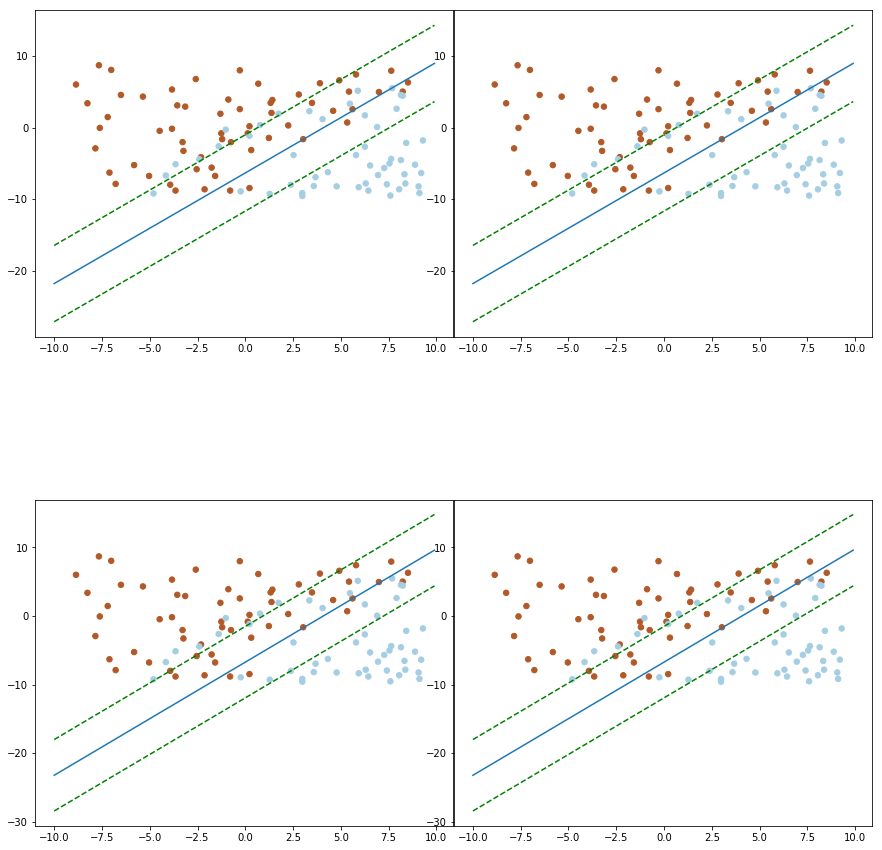

In [13]:
ct=0

fig, axs = plt.subplots(2,2, figsize=(15, 15), facecolor='w', edgecolor='k')

fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for C in [0.1,1,100, 1000000]:    

    Q = np.zeros((x.shape[0]+3, x.shape[0]+3))
    Q[0,0] =1/2 ; Q[1,1] = 1/2
    Q = Q.astype('double')
    Q = matrix(Q)

    P = C*np.ones((x.shape[0]+3,1))
    P[0:3,0] = 0
    P = P.astype('double')
    P = matrix(P)

    G = np.zeros((2*x.shape[0], x.shape[0]+3))

    for i in range(x.shape[0]):
        G[i,0:3] = -y[i]*x_full[i,:]

    G[0:x.shape[0], 3:] = -np.eye(x.shape[0])
    G[x.shape[0]:, 3:] = -np.eye(x.shape[0])
    G = G.astype('double')
    G = matrix(G)

    h = -1*np.ones((2*x.shape[0],1))
    h[x.shape[0]:, 0] = 0
    h = h.astype('double')
    h = matrix(h)
    
    solvers.options['show_progress'] = False
    sol = solvers.qp(Q,P,G,h)
    w = sol['x']
    print('width = ',2/np.dot(w[0:2].T, w[0:2]))

    x_1 = np.arange(-10, 10,0.1)
    x_2 = (-w[2] - w[0]*x_1)/w[1]

    x_u_2 = (1-w[2] - w[0]*x_1)/w[1]
    x_l_2 = (-1-w[2] - w[0]*x_1)/w[1]
    
    axs[ct].scatter(x[:, 0], x[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    axs[ct].plot( x_1, x_2 , x_1, x_u_2 ,'g--', x_1, x_l_2, 'g--' )
    
    ct=ct+1



### Explain your observations here:

It is observed that the changes in margins are very slight. Yet we can still observe that the width of the margin decreases slightly as C is increased. This is because we are increasing the penalty associated with the number of mistakes SVC can make. We would want to keep C low in the case where we want to remedy overfitting.

## d): SVM Kernels

Case 1: (Fig 4) - Low penalty is associated with mischaracterising the training set, hence few mistakes are allowed to remedy overfitting.

Case 2: (Fig 3) - High penalty is associated with mischaracterising the training set, hence may overfit.

Case 3: (Fig 5) - It is the only nonlinear decision boundary that is not elliptical in nature.

Case 4: (Fig 6) - Sharper curves can be taken locally by the decision boundary if the decay constant of the exponential is higher.

Case 5: (Fig 1) - Less sharp curves can be taken locally by the decision boundary if the decay constant of the exponential is lower.